In [1]:
import numpy as np
from math import pi
from numpy import cos, sin, rad2deg
from skimage import io,data
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel, sobel_h, sobel_v
from skimage.feature import canny,corner_harris, corner_peaks
from skimage.transform import hough_line, hough_line_peaks
# from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis
from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis, colorbar, clim,Circle




import time

Text(0.5, 1.0, 'Original Image')

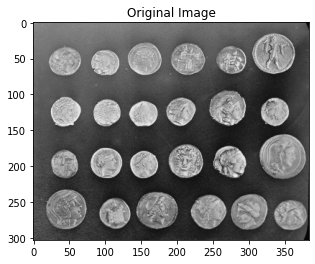

In [46]:
img = data.coins()
# img = imread("proj4.png")
# print(img.shape)
if(len(img.shape) == 3):
    img = rgb2gray(img)
figure
imshow(img, cmap='gray')
title('Original Image')
# img

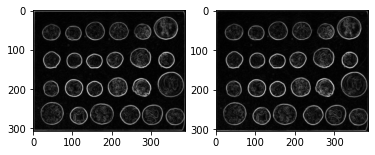

In [47]:
# masking 3*3
def masking(_img, kernel):
    # wraping the image
    m, n = _img.shape
    img= np.zeros((m + 2, n + 2))
    img[1:m + 1, 1:n + 1] = _img
    m,n = img.shape
    
    # op(img, cmap = 'gray')
    img2 = img.copy()
    for i in range(m - 2):
        for j in range(n - 2):
            img2[i + 1, j + 1] = np.sum(img[i:i + 3, j:j + 3] * kernel)
    # img2 = img2.astype(np.uint8)
    
    # imshow(img2, cmap = 'gray')
    return img2
# masks
avg = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
laplacian = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
gaussian = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
prewittx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitty = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

img = masking(img, gaussian)
figure
subplot(1,2,1)
img2 = np.sqrt(masking(img, sobelx)**2+ masking(img,sobely)**2)
imshow(img2,cmap="gray")
subplot(1,2,2)
img2 = sobel(img)
imshow(img2, cmap="gray")


Text(0.5, 1.0, 'Binary Image')

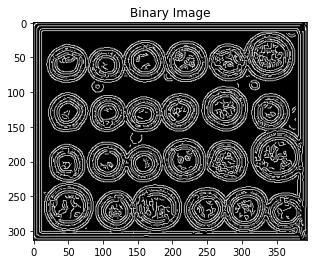

In [44]:
def binImg(img):
    img2 = np.copy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > 0.44:
                img2[i,j] = 255
            else:
                img2[i,j] = 0
    return img2
# img2 = masking(img, avg)
# img2 = binImg(img2)
img2 = canny(img)
# img = img2
# img2 = masking(img2, laplacian)
figure
imshow(img2, cmap='gray')
title('Binary Image')


array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ...,
       [False,  True, False, ..., False,  True, False],
       [False,  True,  True, ...,  True,  True, False],
       [False, False, False, ..., False, False, False]])

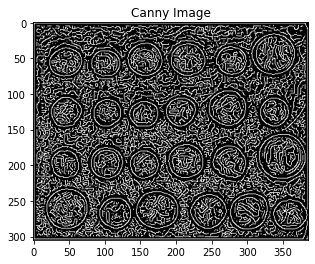

In [48]:
img = canny(img)
# img = binImg(img)
figure
imshow(img, cmap='gray')
title('Canny Image')
img

In [6]:
def floodfill(img, x, y, val):
    if x>=0 and x<img.shape[0] and y>=0 and y<img.shape[1] and img[x,y] == 255:
        img[x,y] = val
        floodfill(img, x-1, y, val)
        floodfill(img, x+1, y, val)
        floodfill(img, x, y-1, val)        
        floodfill(img, x, y+1, val)
        floodfill(img, x-1, y-1, val)
        floodfill(img, x+1, y+1, val)
        floodfill(img, x-1, y+1, val)
        floodfill(img, x+1, y-1, val)
    return img


Text(0.5, 1.0, 'Circles')

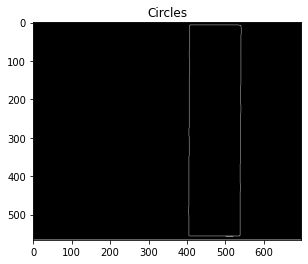

In [7]:
def findComponents(img):
    img2 = np.copy(img)
    val = 10
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            if img2[i,j] == 255:
                # print(i,j," ", end="")
                img2 = floodfill(img2, i, j, val)
                val += 25
        # print("\n")
    return img2
figure
imshow(findComponents(img), cmap='gray')
title('Circles')
 


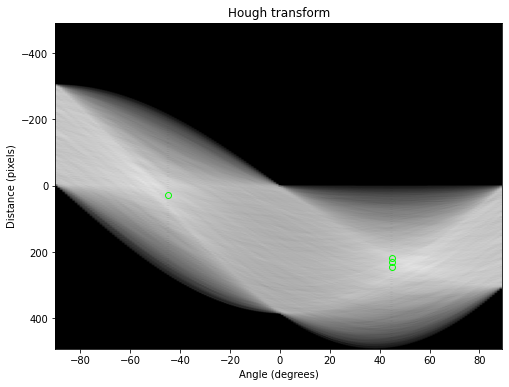

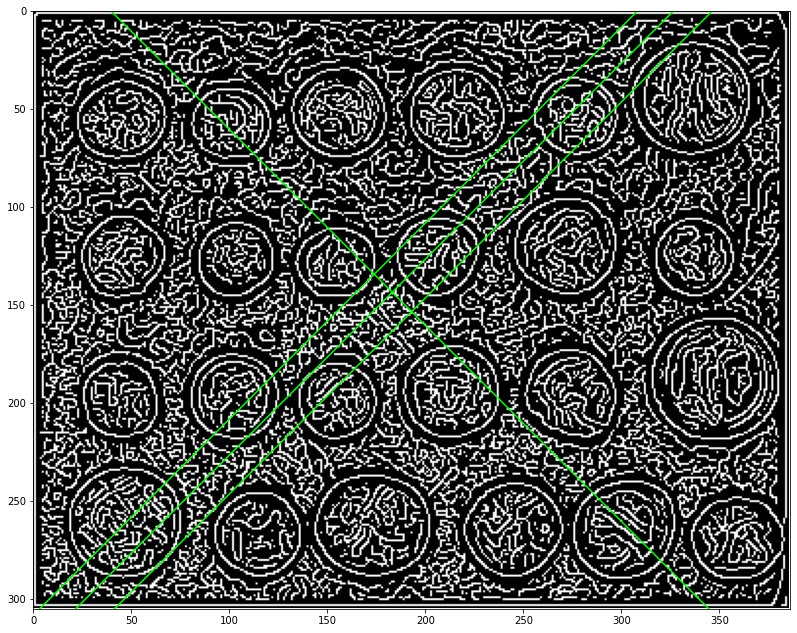

In [51]:
def get_line(x1, y1, x2, y2):
    points = []
    issteep = abs(y2-y1) > abs(x2-x1)
    if issteep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    rev = False
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
        rev = True
    deltax = x2 - x1
    deltay = abs(y2-y1)
    error = int(deltax / 2)
    y = y1
    ystep = None
    if y1 < y2:
        ystep = 1
    else:
        ystep = -1
    for x in range(x1, x2 + 1):
        if issteep:
            points.append((y, x))
        else:
            points.append((x, y))
        error -= deltay
        if error < 0:
            y += ystep
            error += deltax
    # Reverse the list if the coordinates were reversed
    if rev:
        points.reverse()
    return points

# Hough transform to find lines

y = sobel(img)
accumulator, angle, dist  = hough_line(y)

peaks, angles, dists = hough_line_peaks(accumulator, angle, dist, threshold=.5*accumulator.max(), num_peaks=4)
# print(peaks, angles, dists)
axes = (rad2deg(angle[0]), rad2deg(angle[-1]), dist[-1], dist[0])

figure(figsize=(8,6))
imshow(accumulator**.5, cmap="gray", extent=axes, aspect="auto")
xlabel('Angle (degrees)')
ylabel('Distance (pixels)')
title("Hough transform")
plot(rad2deg(angles), dists, marker='o', markeredgecolor='lime', markerfacecolor="none", linestyle="none")
show()

M, N = img.shape

figure(figsize=(14,11))
imshow(img, cmap="gray")

for _, angle, dist in zip(peaks, angles, dists):
    if abs(_) <= 75:
        continue
    x0 = 0
    y0 = dist / (sin(angle)+0.00000001)
    x1 = N
    y1 = (dist - x1*cos(angle)) / (sin(angle)+0.00000001)
    
    plot((x0, x1), (y0, y1), color='lime')
    # get_line(int(x0), int(y0), int(x1), int(y1))
    

axis((0,N,M,0))
show()

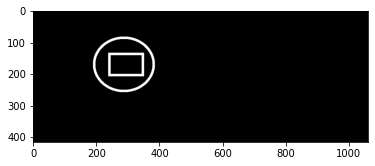

In [6]:
from math import sqrt, atan2, pi
import numpy as np
from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis, colorbar, clim,Circle

def canny_edge_detector(input_image):
    input_pixels = input_image.load()
    width = input_image.width
    height = input_image.height

    # Transform the image to grayscale
    grayscaled = compute_grayscale(input_pixels, width, height)

    # Blur it to remove noise
    blurred = compute_blur(grayscaled, width, height)

    # Compute the gradient
    gradient, direction = compute_gradient(blurred, width, height)

    # Non-maximum suppression
    filter_out_non_maximum(gradient, direction, width, height)

    # Filter out some edges
    keep = filter_strong_edges(gradient, width, height, 20, 25)

    return keep


def compute_grayscale(input_pixels, width, height):
    grayscale = np.empty((width, height))
    for x in range(width):
        for y in range(height):
            pixel = input_pixels[x, y]
            grayscale[x, y] = (pixel[0] + pixel[1] + pixel[2]) / 3
    return grayscale


def compute_blur(input_pixels, width, height):
    # Keep coordinate inside image
    clip = lambda x, l, u: l if x < l else u if x > u else x

    # Gaussian kernel
    kernel = np.array([
        [1 / 256,  4 / 256,  6 / 256,  4 / 256, 1 / 256],
        [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
        [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
        [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
        [1 / 256,  4 / 256,  6 / 256,  4 / 256, 1 / 256]
    ])

    # Middle of the kernel
    offset = len(kernel) // 2

    # Compute the blurred image
    blurred = np.empty((width, height))
    for x in range(width):
        for y in range(height):
            acc = 0
            for a in range(len(kernel)):
                for b in range(len(kernel)):
                    xn = clip(x + a - offset, 0, width - 1)
                    yn = clip(y + b - offset, 0, height - 1)
                    acc += input_pixels[xn, yn] * kernel[a, b]
            blurred[x, y] = int(acc)
    return blurred


def compute_gradient(input_pixels, width, height):
    gradient = np.zeros((width, height))
    direction = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            if 0 < x < width - 1 and 0 < y < height - 1:
                magx = input_pixels[x + 1, y] - input_pixels[x - 1, y]
                magy = input_pixels[x, y + 1] - input_pixels[x, y - 1]
                gradient[x, y] = sqrt(magx**2 + magy**2)
                direction[x, y] = atan2(magy, magx)
    return gradient, direction


def filter_out_non_maximum(gradient, direction, width, height):
    for x in range(1, width - 1):
        for y in range(1, height - 1):
            angle = direction[x, y] if direction[x, y] >= 0 else direction[x, y] + pi
            rangle = round(angle / (pi / 4))
            mag = gradient[x, y]
            if ((rangle == 0 or rangle == 4) and (gradient[x - 1, y] > mag or gradient[x + 1, y] > mag)
                    or (rangle == 1 and (gradient[x - 1, y - 1] > mag or gradient[x + 1, y + 1] > mag))
                    or (rangle == 2 and (gradient[x, y - 1] > mag or gradient[x, y + 1] > mag))
                    or (rangle == 3 and (gradient[x + 1, y - 1] > mag or gradient[x - 1, y + 1] > mag))):
                gradient[x, y] = 0


def filter_strong_edges(gradient, width, height, low, high):
    # Keep strong edges
    keep = set()
    for x in range(width):
        for y in range(height):
            if gradient[x, y] > high:
                keep.add((x, y))

    # Keep weak edges next to a pixel to keep
    lastiter = keep
    while lastiter:
        newkeep = set()
        for x, y in lastiter:
            for a, b in ((-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)):
                if gradient[x + a, y + b] > low and (x+a, y+b) not in keep:
                    newkeep.add((x+a, y+b))
        keep.update(newkeep)
        lastiter = newkeep

    return list(keep)



from PIL import Image, ImageDraw
from math import sqrt, pi, cos, sin

from collections import defaultdict

# Load image:
input_image = Image.open("proj4.png")


# Output image:
output_image = Image.new("RGB", input_image.size)
output_image.paste(input_image)
draw_result = ImageDraw.Draw(output_image)

# Find circles
rmin = 80
rmax = 100
steps = 70
threshold = 0.5

points = []
for r in range(rmin, rmax + 1):
    for t in range(steps):
        points.append((r, int(r * cos(2 * pi * t / steps)), int(r * sin(2 * pi * t / steps))))

acc = defaultdict(int)
for x, y in canny_edge_detector(input_image):
    for r, dx, dy in points:
        a = x - dx
        b = y - dy
        acc[(a, b, r)] += 1

circles = []
for k, v in sorted(acc.items(), key=lambda i: -i[1]):
    x, y, r = k
    if v / steps >= threshold and all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
        print(v / steps, x, y, r)
        circles.append((x, y, r))

for x, y, r in circles:
    draw_result.ellipse((x-r, y-r, x+r, y+r), outline=(255,0,0,0))

# Save output image
output_image.save("result.png")
imshow(output_image)